# Plotting exercises using matplotlib and seaborn

## The basics

`matplotlib` and `seaborn` are plotting library that play really well with the other packages we have discussed today (`numpy` and `pandas` in particular). In these exercises we will go through the basics of how to install them, import them and use them.

### Installing and importing

In [1]:
! pip install matplotlib seaborn

In Colab, you will see that these tools are already installed.

In [2]:
# The usual way to import them:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's also import
import numpy as np
import pandas as pd

### My first `matplotlib` plot

The most basic `matplotlib` plot uses two `numpy` arrays.

**Exercise 1:** Plot the figure for the function `f(x) = cos(x)` for `x` between `0` and `2*np.pi`.

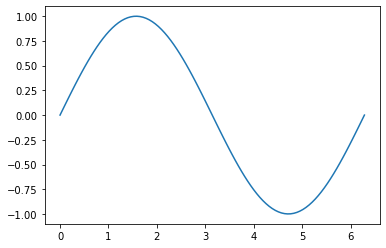

In [13]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)

**Exercise 2:** change the line style to be dotted, and the color to be black.

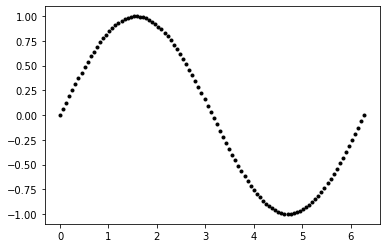

In [14]:
plt.plot(x, y, ".k")

**Exercise 3:** Use a `for` loop to plot `sin(x + k)` for `k` between `0` and `5`

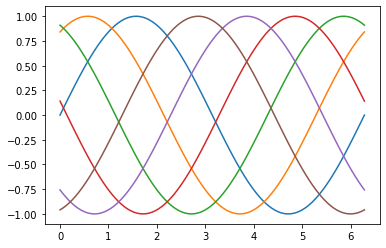

In [15]:
for k in range(6):
  plt.plot(x, np.sin(x + k))

**Exercise 4:** In the previous plot, change the `y` axis such that only `-1` and `1` appear in the ticks. Set appropiate titles, y-labels and x-labels.

Text(0, 0.5, '$y=\\sin(x + k)$')

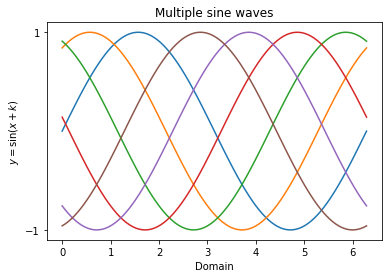

In [19]:
for k in range(6):
  plt.plot(x, np.sin(x + k))

plt.yticks([-1, 1])
plt.title("Multiple sine waves")
plt.xlabel("Domain")
plt.ylabel(r"$y=\sin(x + k)$")

## More advanced plots

In these next plots, we will use more methods of `matplotlib` and more keyword arguments therein.

**Exercise 5:** Create a vector of 1000 samples of a uniform distribution using `np.random.random`, and plot a histogram of them.

(array([ 98.,  95.,  89.,  98., 104.,  91.,  94., 114., 113., 104.]),
 array([1.22272423e-04, 1.00055094e-01, 1.99987916e-01, 2.99920737e-01,
        3.99853559e-01, 4.99786381e-01, 5.99719202e-01, 6.99652024e-01,
        7.99584846e-01, 8.99517667e-01, 9.99450489e-01]),
 <a list of 10 Patch objects>)

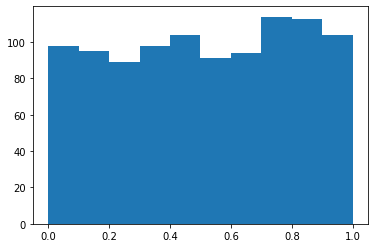

In [20]:
x = np.random.random(1000)
plt.hist(x)

**Exercise 6:** Change the color of the previous plot, and change the width of the rectangles.

(array([ 98.,  95.,  89.,  98., 104.,  91.,  94., 114., 113., 104.]),
 array([1.22272423e-04, 1.00055094e-01, 1.99987916e-01, 2.99920737e-01,
        3.99853559e-01, 4.99786381e-01, 5.99719202e-01, 6.99652024e-01,
        7.99584846e-01, 8.99517667e-01, 9.99450489e-01]),
 <a list of 10 Patch objects>)

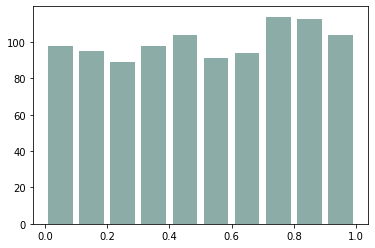

In [21]:
plt.hist(x, color="#8CADA7", rwidth=0.8)

Let's talk about creating **subplots**. For these exercises we will load a dataset from `https://data.cityofnewyork.us/api/views/7yig-nj52/rows.csv`

In [32]:
math_scores = pd.read_csv(
    "https://data.cityofnewyork.us/api/views/7yig-nj52/rows.csv"
)
math_scores.shape

(1568, 16)

**Exercise 7:**
1. What are the columns and data types in the DataFrame `math_scores`?

In [23]:
math_scores.columns

Index(['District', 'Grade', 'Year', 'Demographic', 'Number Tested',
       'Mean Scale Score', 'Num Level 1', 'Pct Level 1', 'Num Level 2',
       'Pct Level 2', 'Num Level 3', 'Pct Level 3', 'Num Level 4',
       'Pct Level 4', 'Num Level 3 and 4', 'Pct Level 3 and 4'],
      dtype='object')

In [24]:
math_scores.dtypes

District               int64
Grade                 object
Year                   int64
Demographic           object
Number Tested          int64
Mean Scale Score       int64
Num Level 1            int64
Pct Level 1          float64
Num Level 2            int64
Pct Level 2          float64
Num Level 3            int64
Pct Level 3          float64
Num Level 4            int64
Pct Level 4          float64
Num Level 3 and 4      int64
Pct Level 3 and 4    float64
dtype: object

Let's modify this dataframe to focus on only one district:

In [43]:
math_scores = math_scores[math_scores["District"] == 1]

2. Use `plt.subplots` to create a 2x2 plot grid.
3. Plot in these 4 subplots the variable `number tested` against `year` for the grades 5, 6, 7, 8.

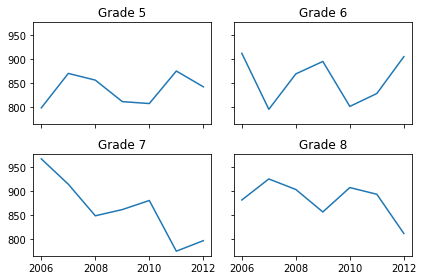

In [45]:
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True)

# A silly way of doing it.
# df = math_scores[math_scores["Grade"] == "5"]
# axes[0, 0].plot(df["Year"], df["Number Tested"])
# axes[0, 0].set_title("Grade 5")

# df = math_scores[math_scores["Grade"] == "6"]
# axes[0, 1].plot(df["Year"], df["Number Tested"])
# axes[0, 1].set_title("Grade 6")

# df = math_scores[math_scores["Grade"] == "7"]
# axes[1, 0].plot(df["Year"], df["Number Tested"])
# axes[1, 0].set_title("Grade 7")

# df = math_scores[math_scores["Grade"] == "8"]
# axes[1, 1].plot(df["Year"], df["Number Tested"])
# axes[1, 1].set_title("Grade 8")


# A better way of doing it
axes = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]
for ax, grade in zip(axes, ["5", "6", "7", "8"]):
  df = math_scores[math_scores["Grade"] == grade]
  ax.plot(df["Year"], df["Number Tested"])
  ax.set_title(f"Grade {grade}")

plt.tight_layout()

## Using seaborn

`Seaborn` is a plotting library that focuses on making some common statistics plots (e.g. violin plots, box plots, scatters, kernel density estimations...) easier to get.

In the following examples we will use a DataFrame provided by `seaborn` itself:

In [47]:
df_penguins = sns.load_dataset("penguins")

**Exercise 8:**
1. What are the columns and data types in `df_penguins`?
2. Clean this DataFrame from `NaN` values. How many rows were lost?

In [48]:
df_penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [51]:
print(df_penguins.shape)
print(df_penguins.dropna().shape)

df_penguins.dropna(inplace=True)
df_penguins

(344, 7)
(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**Exercise 9:** Use `sns.pairplot` to understand the relationship between the columns `"bill_length_mm", "bill_depth_mm", "flipper_length_mm"`. Illuminate by species.

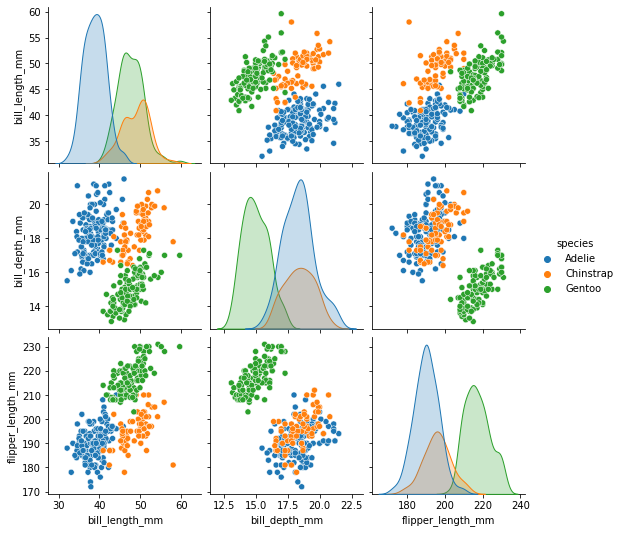

In [52]:
sns.pairplot(
    data=df_penguins,
    hue="species",
    vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
)